In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# defining the function
def f(t,x):
  return (1-2*t)*x


In [15]:
# Trapezoid method
# Description: function (f), time, partition (N), initial value (init)
def IVPTrapezoid(f, time, N, init):
  M = 10    #maximum iterations of predictor
  t0, tf=time
  h=(tf-t0)/N
  t=np.linspace(t0, tf, N+1)
  x=np.zeros([N+1, M+1])

  #saving the 0-N partition of time, 0-M predictors of solution
  x[0, 0:M+1]=init     #initial value of each predictor, t=0
  #iterate the initial value of predictors
  for i in range(N):
    x[i+1,0]=x[i,0]+h*f(t[i], x[i,0])

  #iteration of Trapezoid method
  for i in range(N):
    for j in range(M):
      x[i+1,j+1]=x[i,M] + (h/2)*(f(t[i], x[i,M]) + f(t[i+1], x[i+1,j]))
  return [t, x[:, M]]

  # Return the last solution of the last iteration, at M step

In [16]:
#Result
sol = IVPTrapezoid(f, [0,2], 10, 1)

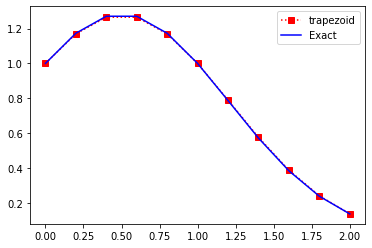

In [18]:
plt.figure(1)
plt.plot(sol[0], sol[1], 'sr:', label='trapezoid')
plt.plot(sol[0], np.exp((1/4)-((1/2)-sol[0])**2), '-b', label='Exact')
plt.legend(loc='best')
plt.show()

In [19]:
# Display the effect of partition
n=[1e1, 1e2, 1e3, 1e4]
color=['or:', 'ob:', 'om:', 'ok:']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.str` is a deprecated alias f

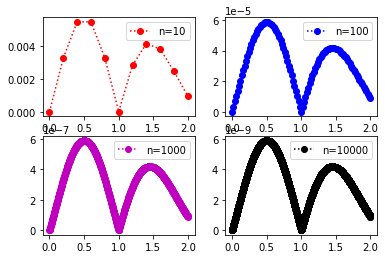

In [20]:
#Error curve for each partition size
plt.figure(2)
for i in range(np.size(n)):
  sol=IVPTrapezoid(f, [0,2], int(n[i]), 1)
  error=np.abs(sol[1]-np.exp((1/4)-((1/2)-sol[0])**2))
  plt.subplot(2,2,i+1)
  plt.plot(sol[0], error, color[i], label='n='+np.str(int(n[i])))
  plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`

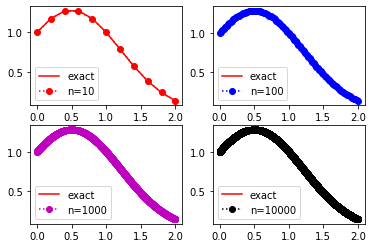

In [21]:
# Curve of solution for each partition size
plt.figure(3)
for i in range(np.size(n)):
  sol=IVPTrapezoid(f, [0,2], int(n[i]), 1)
  exact=np.exp((1/4)-((1/2)-sol[0])**2)
  plt.subplot(2,2,i+1)
  plt.plot(sol[0], exact, '-r', label='exact')
  plt.plot(sol[0], sol[1], color[i], label='n='+np.str(int(n[i])))
  plt.legend(loc='best')
plt.show()